# installing  libraries

In [2]:
pip install Seaborn

In [3]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


# importing libraries 

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import nltk 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,plot_roc_curve

In [5]:
ps=nltk.PorterStemmer()

# importing and visualizing data

In [6]:
data=pd.read_csv("news.csv")

In [7]:
data.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [8]:
data.shape

(6335, 4)

# splinting   and ploting  data

In [9]:
x=data['text']
y=data['label']

In [10]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

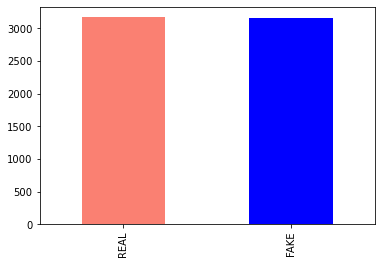

In [11]:
data["label"].value_counts().plot(kind='bar',color=['salmon','blue'])

In [12]:
data["label"].value_counts()

REAL    3171
FAKE    3164
Name: label, dtype: int64

# cleaning and vectorizing data


In [13]:
def clean_txt(txt):
  txt=" ".join([w for w in txt.split() if len(w)>3 ])
  tokens=txt.split()
  txt=[ps.stem(word) for  word in tokens]
  return txt

In [14]:
tfidf_vect=TfidfVectorizer(max_df = 0.9 ,min_df =2, max_features =1000 ,stop_words="english" , tokenizer=clean_txt)

In [15]:
tfidt_fit=tfidf_vect.fit(x_train)
x_train=tfidt_fit.transform(x_train)
x_test=tfidt_fit.transform(x_test)

C:\project\env\lib\site-packages\sklearn\feature_extraction\text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
C:\project\env\lib\site-packages\sklearn\feature_extraction\text.py:382: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'formerli', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'latterli', 'mani', 'meanwhil', 'moreov', 'mostli', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'seriou', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'the

In [16]:
x_train.shape,y_train.shape

((4434, 1000), (4434,))

In [17]:
x_train.dtype

dtype('float64')

# fitting model

In [18]:
model=PassiveAggressiveClassifier(max_iter=100)
model.fit(x_train,y_train)


PassiveAggressiveClassifier(C=1.0, average=False, class_weight=None,
                            early_stopping=False, fit_intercept=True,
                            loss='hinge', max_iter=100, n_iter_no_change=5,
                            n_jobs=None, random_state=None, shuffle=True,
                            tol=0.001, validation_fraction=0.1, verbose=0,
                            warm_start=False)

# prediction and score

In [19]:
preds=model.predict(x_test)

In [20]:
score=accuracy_score(y_test,preds)

In [21]:
print(f"Accuracy score : {round(score*100,2)}%")

Accuracy score : 85.85%


In [22]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

        FAKE       0.87      0.84      0.86       951
        REAL       0.84      0.88      0.86       950

    accuracy                           0.86      1901
   macro avg       0.86      0.86      0.86      1901
weighted avg       0.86      0.86      0.86      1901



# confusion matrix and roc curve

Text(42.0, 0.5, 'Prediction')

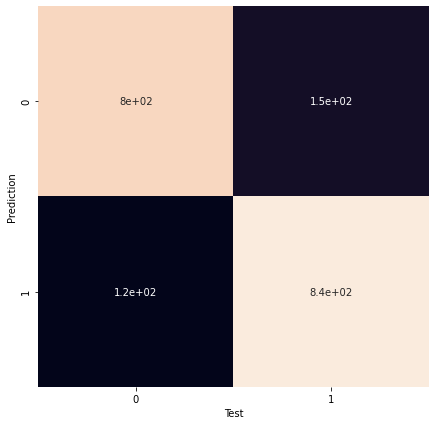

In [23]:
fig,ax=plt.subplots(figsize=(7,7))
ax=sns.heatmap(confusion_matrix(y_test,preds),
              annot=True,
              cbar=False)
plt.xlabel('Test')
plt.ylabel('Prediction')



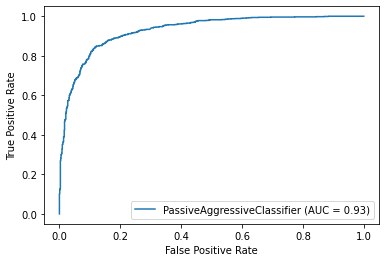

In [24]:
plot_roc_curve(model,x_test,y_test)

In [25]:
print(f'roc_auc_score : {model,x_test,y_test}')

roc_auc_score : (PassiveAggressiveClassifier(C=1.0, average=False, class_weight=None,
                            early_stopping=False, fit_intercept=True,
                            loss='hinge', max_iter=100, n_iter_no_change=5,
                            n_jobs=None, random_state=None, shuffle=True,
                            tol=0.001, validation_fraction=0.1, verbose=0,
                            warm_start=False), <1901x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 222333 stored elements in Compressed Sparse Row format>, 3503    FAKE
1911    REAL
2845    REAL
1000    FAKE
2493    FAKE
        ... 
4813    FAKE
4523    REAL
62      REAL
620     FAKE
863     REAL
Name: label, Length: 1901, dtype: object)
